## Introduction

The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics', Wiley, 1980. 

In [57]:
# importing required libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

1.	Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [58]:
# reading the dataset
hs = pd.read_csv(r'C:\Users\ASUS\Desktop\python\dataset\odin_school\EDA\housing.csv',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'], sep=r'\s+')

In [59]:
# viewing the dataset
hs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [60]:
hs.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


2. Provide the following information about the dataframe

- Dimensions of the dataframe

In [61]:
hs.shape

(506, 14)

In [62]:
print(f'The data we have has {hs.shape[0]} observations and {hs.shape[1]} variables.')

The data we have has 506 observations and 14 variables.


- Information about the schema

In [63]:
hs.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

| **Variable** | **Information** |
| - | - |
| **CRIM** | per capita crime rate by town |
| **ZN** |proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | proportion of non-retail business acres per town |
| **CHAS** | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX** | nitric oxides concentration (parts per 10 million) |
| **RM** | average number of rooms per dwelling |
| **AGE** | proportion of owner-occupied units built prior to 1940 |
| **DIS** | weighted distances to five Boston employment centres |
| **RAD** | index of accessibility to radial highways |
| **TAX** | full-value property-tax rate per $10,000 |
| **PTRATIO** | pupil-teacher ratio by town |
| **B** | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| **LSTAT** | % lower status of the population |
| **MEDV** | Median value of owner-occupied homes in $1000's |

- Statistical metrics of each column

In [64]:
hs.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [66]:
hs.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

3.	Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps

- Missing values


In [67]:
cat_col = ['CHAS','RAD']
num_col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
hs[cat_col] = hs[cat_col].astype('category')

In [68]:
hs.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

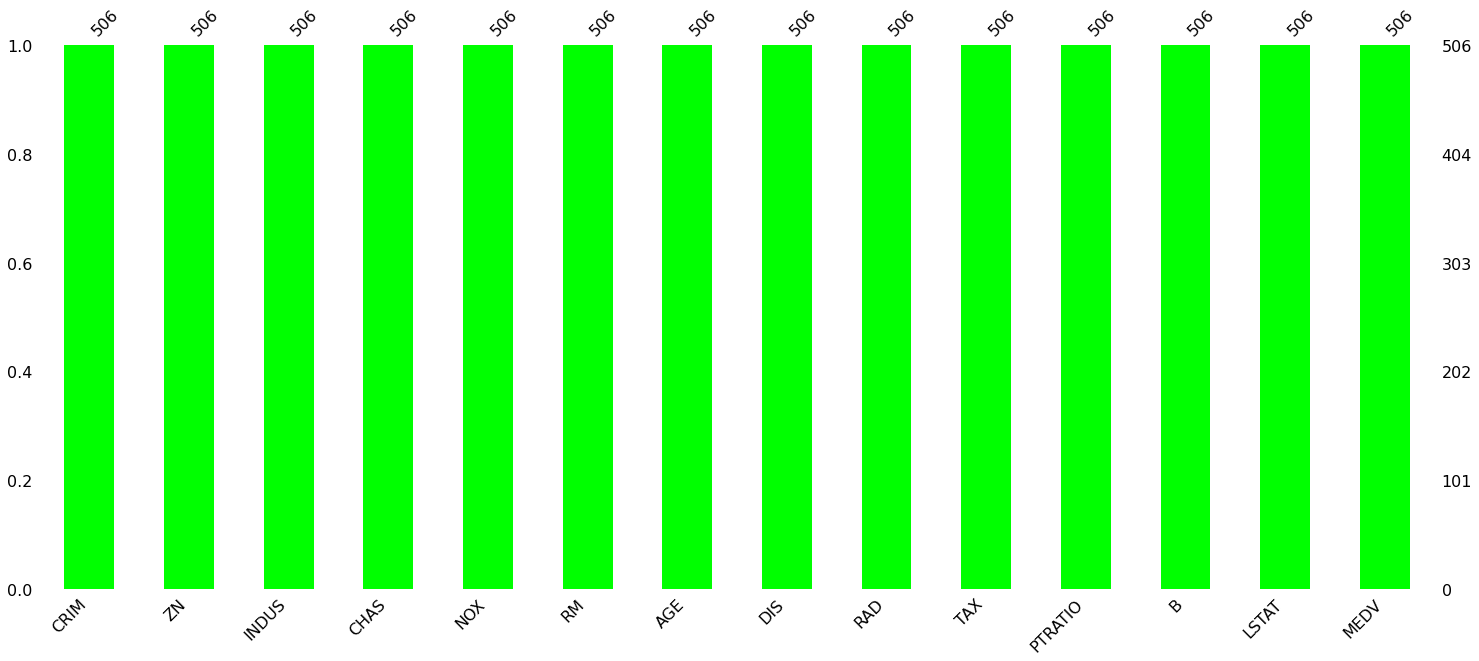

In [69]:
msno.bar(hs,color='#00FF00')
plt.show()

as we can see we don't have any missing values in the dataset

- Erroneous/wrong values

- Skewed Data

In [70]:
hs[num_col].skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

| **skew** | **range**| **variable** |
| - | - | - |
| highly | <-1 & >1 | CRIM, ZN, DIS, B, MEDV |
| moderate | (-1 to -0.5) & (o.5 to 1)| NOX, RM, TAX, PTRATIO, LSTAT |
| symmetrical | -0.5 to 0.5 | INDUS, RM |

<Figure size 720x432 with 0 Axes>

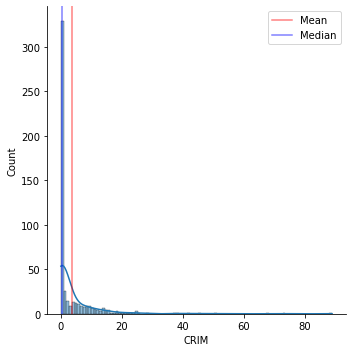

<Figure size 720x432 with 0 Axes>

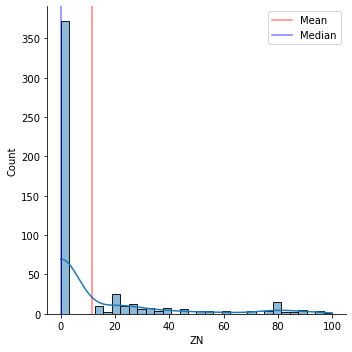

<Figure size 720x432 with 0 Axes>

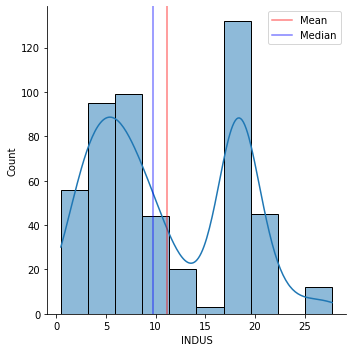

<Figure size 720x432 with 0 Axes>

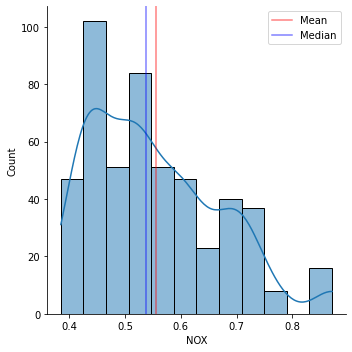

<Figure size 720x432 with 0 Axes>

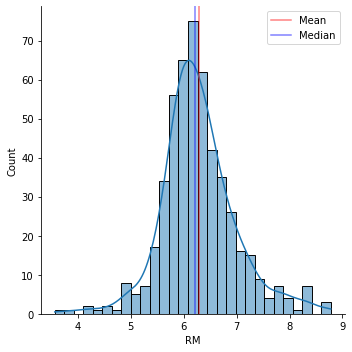

<Figure size 720x432 with 0 Axes>

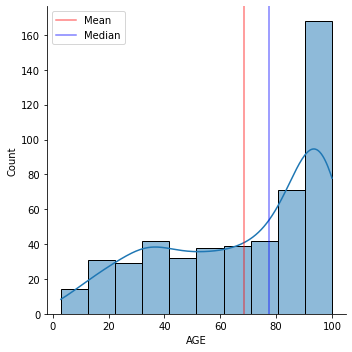

<Figure size 720x432 with 0 Axes>

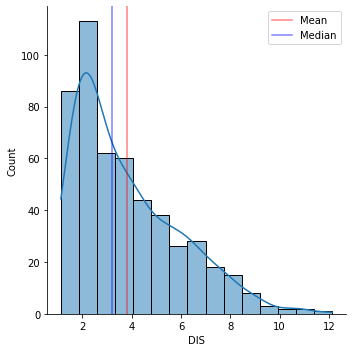

<Figure size 720x432 with 0 Axes>

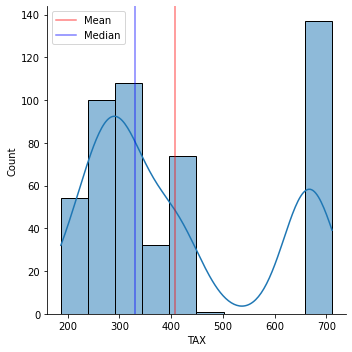

<Figure size 720x432 with 0 Axes>

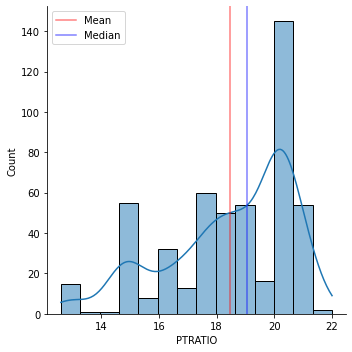

<Figure size 720x432 with 0 Axes>

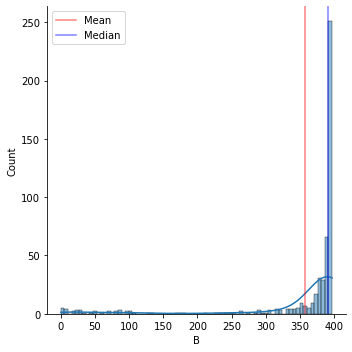

<Figure size 720x432 with 0 Axes>

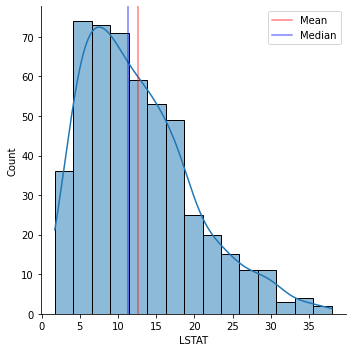

<Figure size 720x432 with 0 Axes>

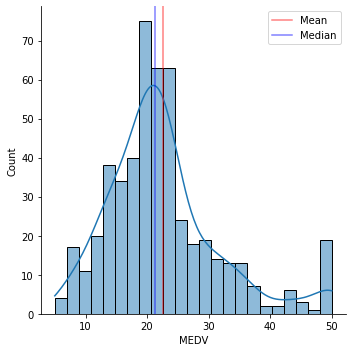

In [71]:
for i in num_col:
    plt.figure(figsize=(10,6))
    sns.displot(data=hs, x = i, kde=True)
    plt.axvline(x=hs[i].mean(), color='red', alpha=0.5, label= 'Mean')
    plt.axvline(x=hs[i].median(), color='blue', alpha=0.5, label= 'Median')
    plt.legend()
    plt.show()

- outliers

In [72]:
hs[num_col].describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [73]:
for i in num_col:
    q1,q3 = np.percentile(hs[i],(25,75))
    iqr = round((q3-q1),2)
    upper_whisker = q3 + (1.5*iqr) # formulas
    lower_whisker = q1 - (1.5*iqr)
    hs[hs[i]>upper_whisker][i]
    outliers = len(hs[hs[i]>upper_whisker][i])
    print(f'Outliers in {i}', round((outliers/hs.shape[0])*100, 2), '%')



Outliers in CRIM 13.04 %
Outliers in ZN 13.44 %
Outliers in INDUS 0.0 %
Outliers in NOX 0.0 %
Outliers in RM 4.35 %
Outliers in AGE 0.0 %
Outliers in DIS 0.99 %
Outliers in TAX 0.0 %
Outliers in PTRATIO 0.0 %
Outliers in B 0.0 %
Outliers in LSTAT 1.38 %
Outliers in MEDV 7.51 %


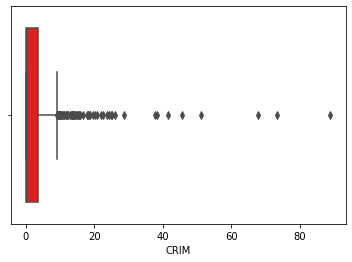

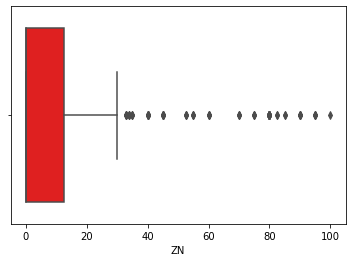

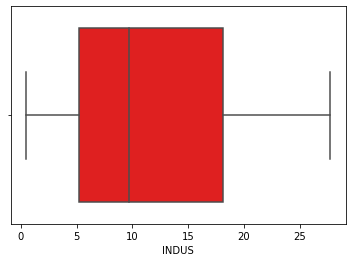

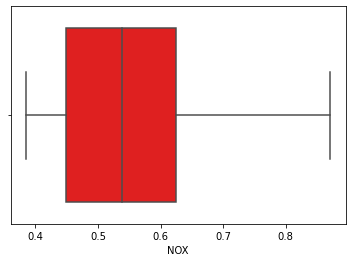

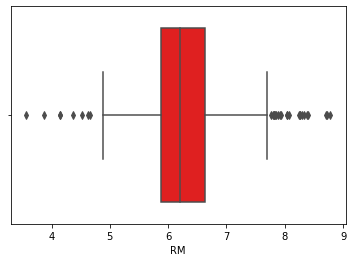

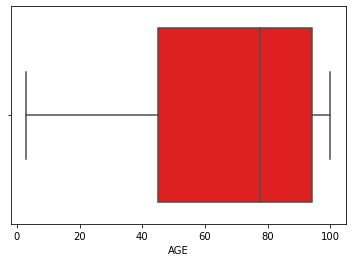

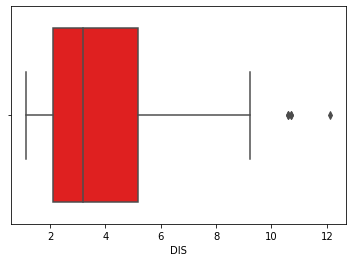

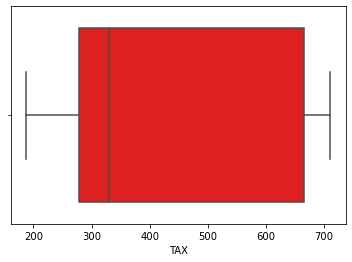

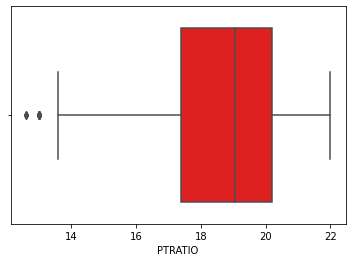

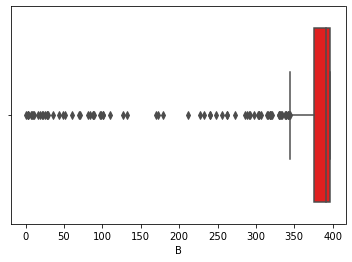

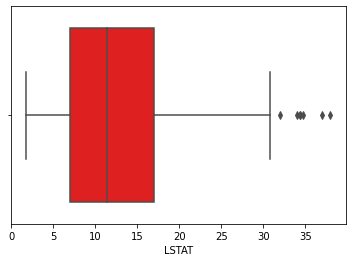

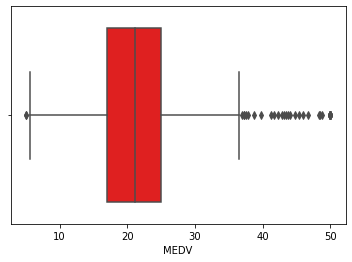

In [74]:
for i in num_col:
    sns.boxplot(data = hs, x=i, color='r')
    plt.show()

4. Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots. Few hints to get you started

- Distribution of numerical variables


<Figure size 720x432 with 0 Axes>

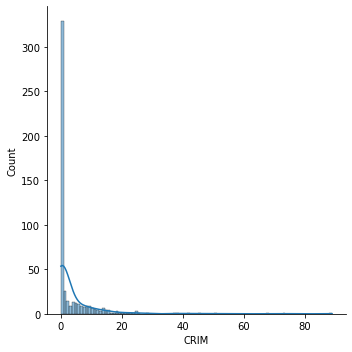

<Figure size 720x432 with 0 Axes>

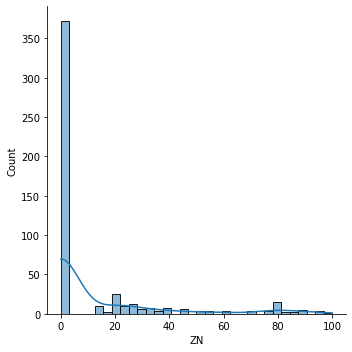

<Figure size 720x432 with 0 Axes>

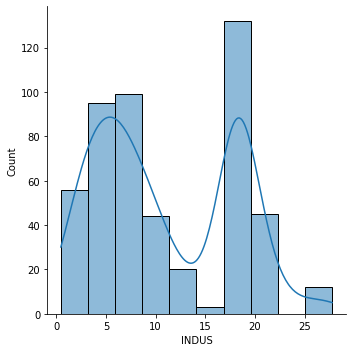

<Figure size 720x432 with 0 Axes>

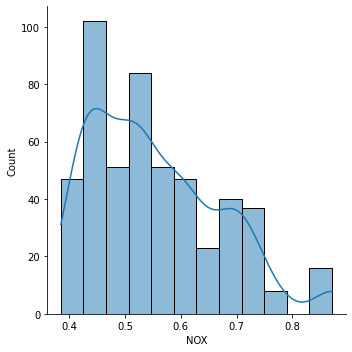

<Figure size 720x432 with 0 Axes>

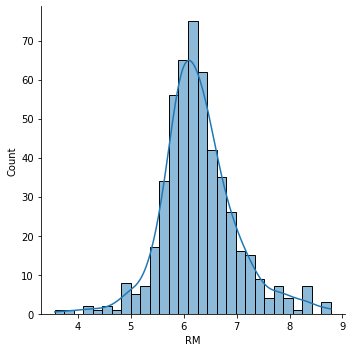

<Figure size 720x432 with 0 Axes>

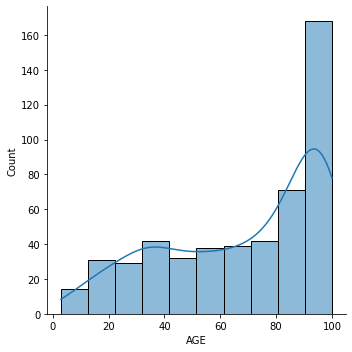

<Figure size 720x432 with 0 Axes>

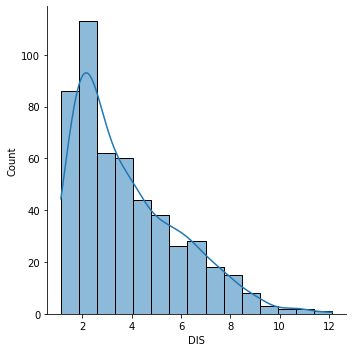

<Figure size 720x432 with 0 Axes>

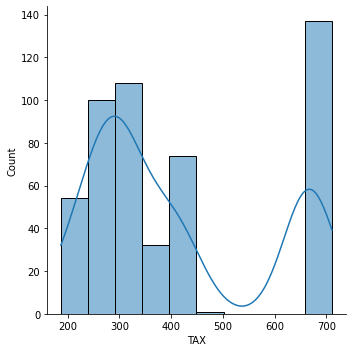

<Figure size 720x432 with 0 Axes>

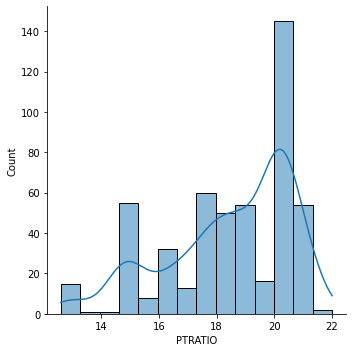

<Figure size 720x432 with 0 Axes>

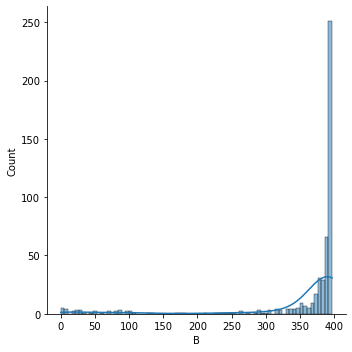

<Figure size 720x432 with 0 Axes>

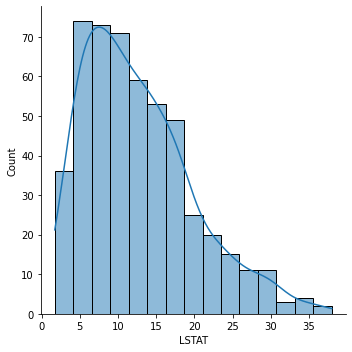

<Figure size 720x432 with 0 Axes>

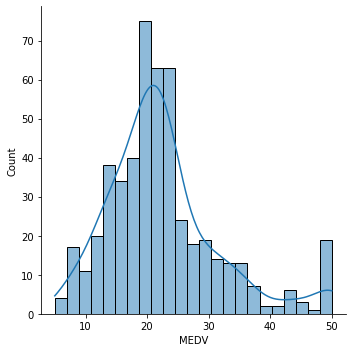

In [75]:
for i in num_col:
    plt.figure(figsize=(10,6))
    sns.displot(data=hs, x = i, kde=True)
    plt.show()

- Distribution of categorical variables

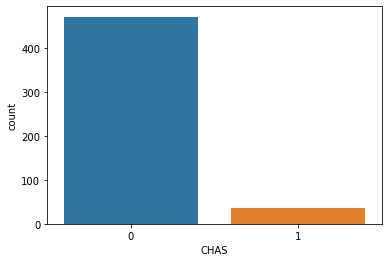

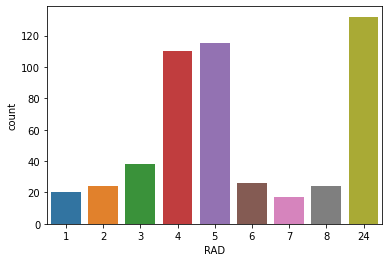

In [76]:
for i in cat_col:
    sns.countplot(data=hs, x= i)
    plt.show()

- Numerical vs Categorical plots

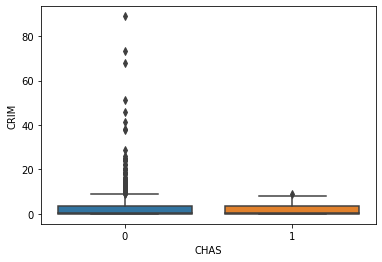

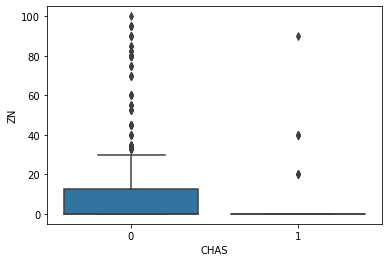

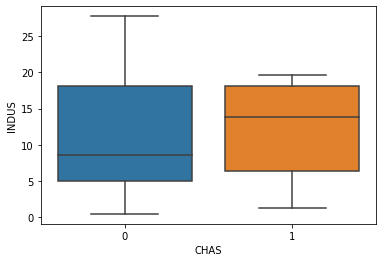

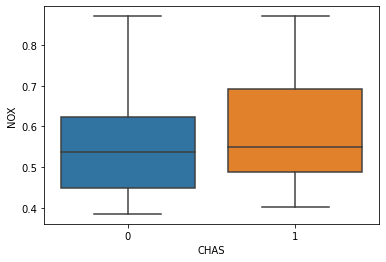

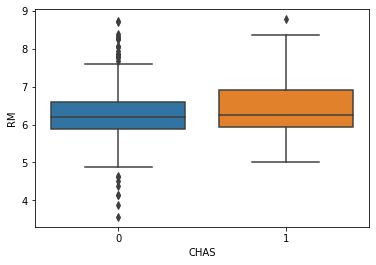

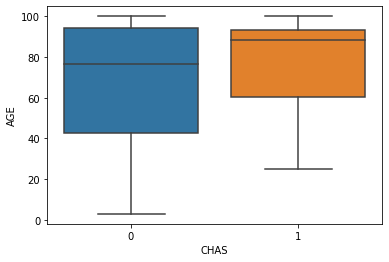

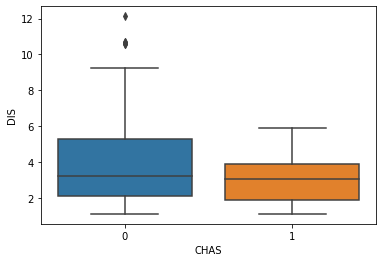

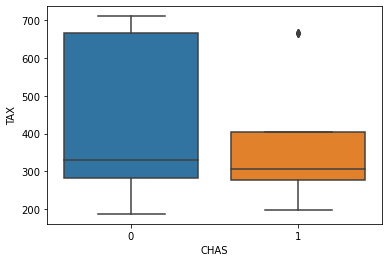

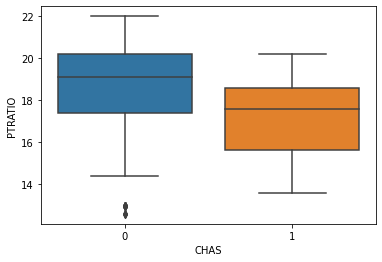

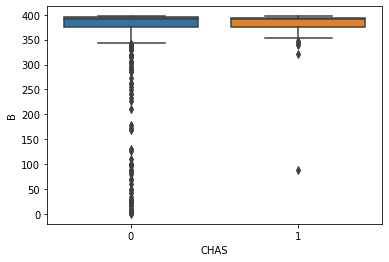

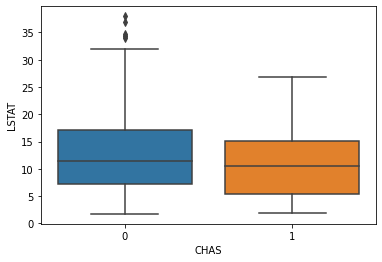

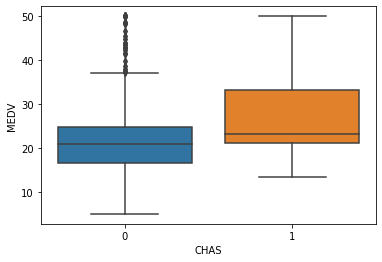

In [77]:
for i in num_col:
    sns.boxplot(data=hs, x='CHAS', y = i)
    plt.show()

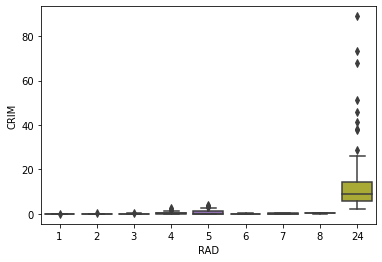

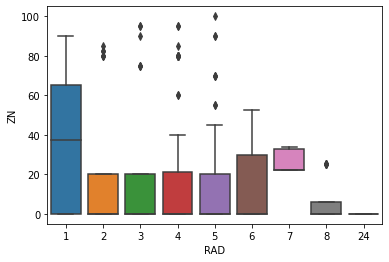

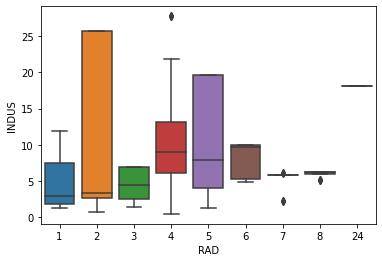

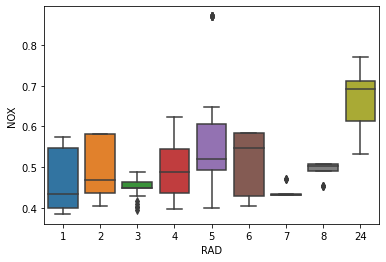

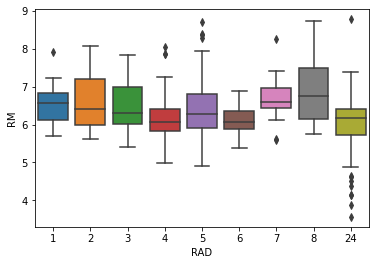

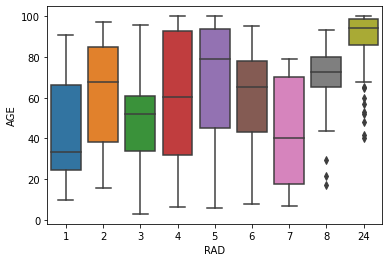

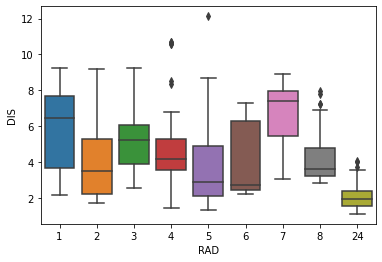

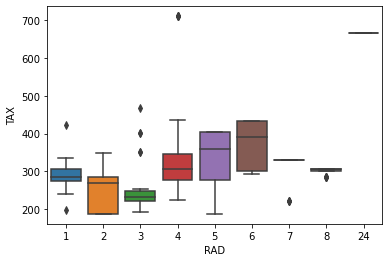

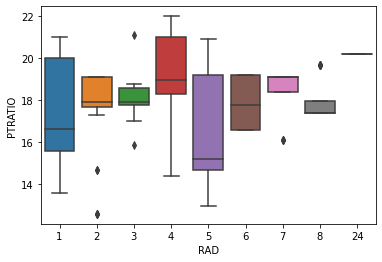

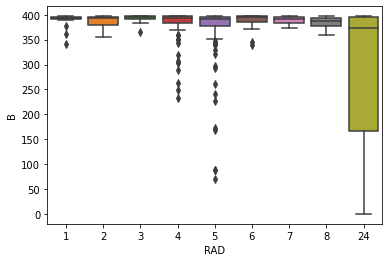

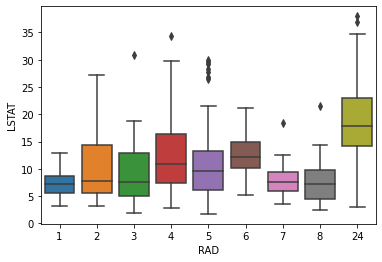

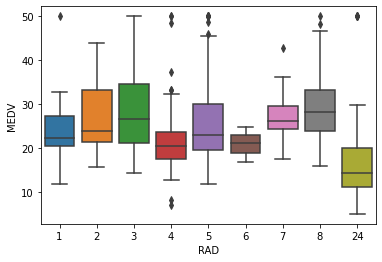

In [78]:
for i in num_col:
    sns.boxplot(data=hs, x='RAD', y = i)
    plt.show()

- Numerical vs Numerical plots

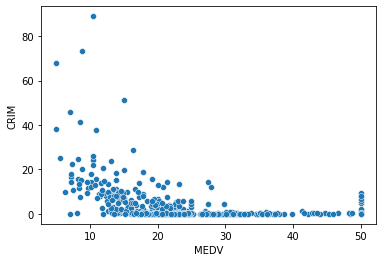

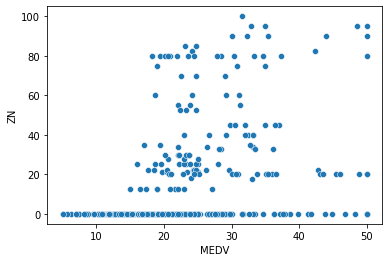

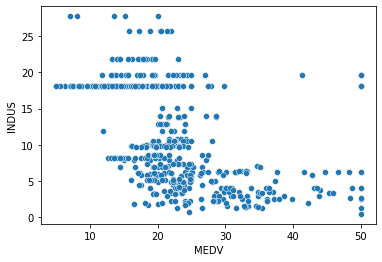

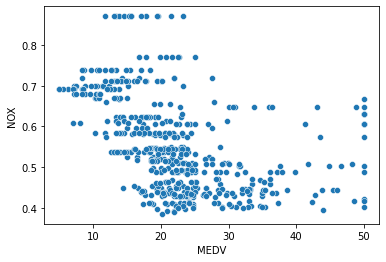

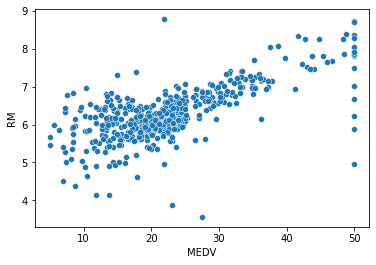

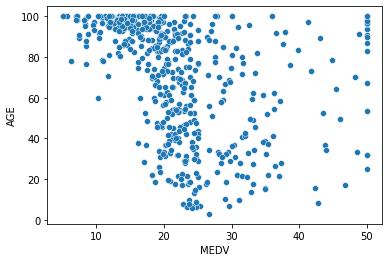

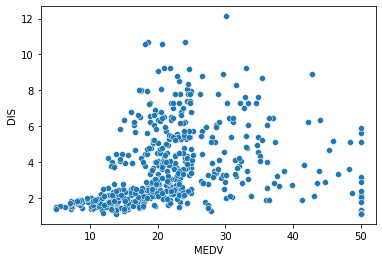

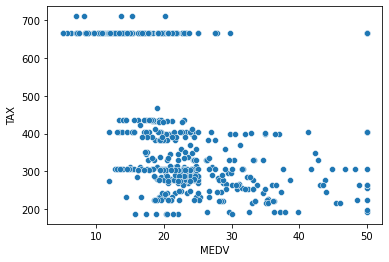

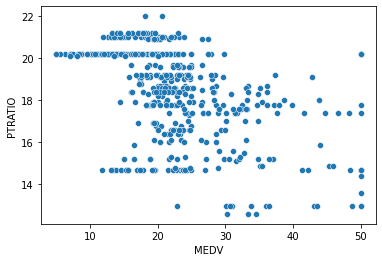

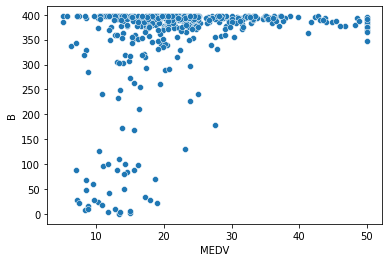

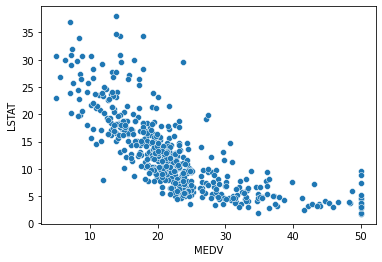

In [79]:
for i in num_col:
    if i=='MEDV':
        break
    sns.scatterplot(data=hs, y = i, x= 'MEDV')
    plt.show()